In [1]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from pathlib import Path
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data


%matplotlib inline

In [2]:
# Your key here
AV_API_KEY = ("1E36JBWDR6HVU83X")

# Chose your output format, or default to JSON (python dict)
#ts = TimeSeries(key, output_format='pandas')
#ti = TechIndicators(key)

In [3]:
cryptos = pd.read_csv('Resources/digital_currency_list.csv')
cryptos[cryptos['currency name'].str.contains('Bitcoin')]

,currency code,currency name
41,BCD,Bitcoin-Diamond
42,BCH,Bitcoin-Cash
45,BCX,BitcoinX
77,BTC,Bitcoin
78,BTCD,BitcoinDark
79,BTCP,Bitcoin-Private
80,BTG,Bitcoin-Gold
394,SBTC,Super-Bitcoin
500,XBC,Bitcoin-Plus


In [4]:
cryptos[cryptos['currency name'].str.contains('Ethereum')]

,currency code,currency name
166,ETC,Ethereum-Classic
167,ETH,Ethereum
168,ETHD,Ethereum-Dark


In [5]:
curr = pd.read_csv('Resources/physical_currency_list.csv')
curr[curr['currency code'] == 'USD']

,currency code,currency name
139,USD,United States Dollar


In [6]:
#resp.output_format ='pandas'
resp = requests.get('https://www.alphavantage.co/query', params={
    'function': 'DIGITAL_CURRENCY_DAILY',
    'symbol': 'BTC',
    'market': 'USD',
    'apikey': AV_API_KEY
})
doc_btc=resp.json()
doc_btc['Meta Data']
doc_btc['Time Series (Digital Currency Daily)']['2020-04-30']

{'1a. open (USD)': '8778.58000000',
 '1b. open (USD)': '8778.58000000',
 '2a. high (USD)': '9460.00000000',
 '2b. high (USD)': '9460.00000000',
 '3a. low (USD)': '8401.00000000',
 '3b. low (USD)': '8401.00000000',
 '4a. close (USD)': '8620.00000000',
 '4b. close (USD)': '8620.00000000',
 '5. volume': '206277.21412400',
 '6. market cap (USD)': '206277.21412400'}

In [7]:
resp_eth = requests.get('https://www.alphavantage.co/query', params={
    'function': 'DIGITAL_CURRENCY_DAILY',
    'symbol': 'ETH',
    'market': 'USD',
    'apikey': AV_API_KEY
})

doc_eth=resp_eth.json()
#doc_eth['Meta Data']
doc_eth['Time Series (Digital Currency Daily)']['2020-04-30']


{'1a. open (USD)': '215.40000000',
 '1b. open (USD)': '215.40000000',
 '2a. high (USD)': '227.30000000',
 '2b. high (USD)': '227.30000000',
 '3a. low (USD)': '202.00000000',
 '3b. low (USD)': '202.00000000',
 '4a. close (USD)': '206.08000000',
 '4b. close (USD)': '206.08000000',
 '5. volume': '1749691.00151000',
 '6. market cap (USD)': '1749691.00151000'}

In [8]:
df_btc = pd.DataFrame.from_dict(doc_btc['Time Series (Digital Currency Daily)'], orient='index', dtype=np.float)
df_eth = pd.DataFrame.from_dict(doc_eth['Time Series (Digital Currency Daily)'], orient='index', dtype=np.float)
df_eth.tail()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2017-08-21,299.10,299.10,346.52,346.52,294.60,294.60,323.29,323.29,5219.44542,5219.44542
2017-08-20,289.41,289.41,300.53,300.53,282.85,282.85,299.10,299.10,2510.13871,2510.13871
2017-08-19,293.31,293.31,299.90,299.90,278.00,278.00,290.91,290.91,2146.19773,2146.19773
2017-08-18,302.00,302.00,311.79,311.79,283.94,283.94,293.96,293.96,9537.84646,9537.84646
2017-08-17,301.13,301.13,312.18,312.18,298.00,298.00,302.00,302.00,7030.71034,7030.71034


In [9]:
[c for c in df_btc.columns.values if 'b.' in c]

['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)']

In [10]:
df_btc.drop(columns=[c for c in df_btc.columns.values if 'b.' in c], inplace=True)
df_btc.tail()

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,6. market cap (USD)
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,691.743060
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,467.083022
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,381.309763
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1199.888264
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,795.150377


In [11]:
[c for c in df_eth.columns.values if 'b.' in c]
df_eth.drop(columns=[c for c in df_eth.columns.values if 'b.' in c], inplace=True)
df_eth.tail()

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,6. market cap (USD)
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,5219.44542
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,2510.13871
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,2146.19773
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,9537.84646
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,7030.71034


In [12]:
combined_df = pd.concat([df_btc['4a. close (USD)'], df_eth['4a. close (USD)']], axis=1, join='inner')
combined_df.columns = ['BTC', 'ETH']
combined_df.tail()

,BTC,ETH
2017-08-21,4016.00,323.29
2017-08-20,4086.29,299.10
2017-08-19,4139.98,290.91
2017-08-18,4108.37,293.96
2017-08-17,4285.08,302.00


<Figure size 2000x1000 with 0 Axes>

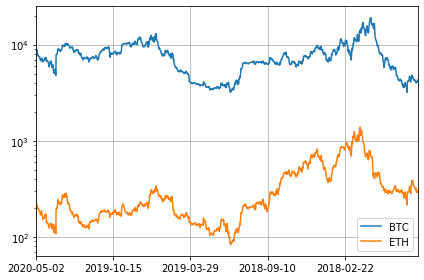

In [14]:
# Visualization
figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
combined_df.plot(logy=True)
plt.tight_layout()
plt.grid()
plt.show()

In [15]:
data = Path("S&P500.csv")
new_data= pd.read_csv(data, parse_dates=True, infer_datetime_format=True)
new_data = new_data.set_index('Date')
new_data.isnull().mean()
new_data.isnull().sum()
new_data = new_data.dropna()
new_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-24,2812.639893,2842.709961,2791.760010,2836.739990,2836.739990,5374480000
2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,3721235517


In [16]:
new_data = new_data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
new_data = new_data.rename(columns={"Close": "S&P_500 Close"})
new_data.head()

,S&P_500 Close
Date,
2019-05-08,2879.419922
2019-05-09,2870.719971
2019-05-10,2881.399902
2019-05-13,2811.870117
2019-05-14,2834.409912


In [17]:
gold = Path("gold_price.csv")
new_gold= pd.read_csv(gold, parse_dates=True, infer_datetime_format=True)
new_gold = new_gold.set_index('Date')
new_gold.isnull().mean()
new_gold.isnull().sum()
new_gold = new_gold.dropna()
new_gold.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-26,1740.199951,1743.300049,1737.099976,1741.400024,1741.400024,269034.0
2020-04-27,1742.300049,1745.800049,1717.000000,1720.300049,1720.300049,80903668.0
2020-04-28,1713.000000,1731.900024,1704.099976,1721.000000,1721.000000,96211082.0
2020-04-29,1724.800049,1733.500000,1708.199951,1722.199951,1722.199951,156725.0
2020-04-30,1729.500000,1737.000000,1687.500000,1695.400024,1695.400024,110088974.0


In [18]:
gold_data = new_gold.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gold_data = gold_data.rename(columns={"Close": "Gold Close"})
gold_data.head()

,Gold Close
Date,
2019-05-08,1279.400024
2019-05-09,1283.500000
2019-05-10,1285.699951
2019-05-13,1300.099976
2019-05-14,1294.699951


In [19]:
combined_data = pd.concat([gold_data, new_data], axis="columns", join="inner")
combined_data.head()

,Gold Close,S&P_500 Close
Date,,
2019-05-08,1279.400024,2879.419922
2019-05-09,1283.500000,2870.719971
2019-05-10,1285.699951,2881.399902
2019-05-13,1300.099976,2811.870117
2019-05-14,1294.699951,2834.409912


In [20]:
new_combined_data = combined_data.pct_change().dropna()

In [21]:
sharpe_ratios = (new_combined_data.mean() * 252) / (new_combined_data.std() * np.sqrt(252))
sharpe_ratios

Gold Close       1.516987
S&P_500 Close    0.200653
dtype: float64

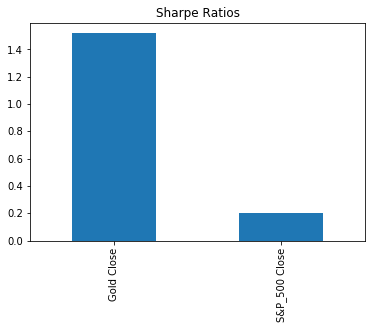

In [22]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [35]:
alt.Chart(combined_data).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', sort=['Gold Close', 'S&P_500 Close']
).properties(height=50, width=400))

AttributeError: 'Row' object has no attribute 'properties'

In [25]:
combined_data.head()

,Gold Close,S&P_500 Close
Date,,
2019-05-08,1279.400024,2879.419922
2019-05-09,1283.500000,2870.719971
2019-05-10,1285.699951,2881.399902
2019-05-13,1300.099976,2811.870117
2019-05-14,1294.699951,2834.409912
